<a href="https://colab.research.google.com/github/Adham-Gom3aa/Chess-AI/blob/main/FP1_copy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC


In [40]:
import csv
import pandas as pd

def clean_csv(path, new_path):
    with open(path, 'r', encoding='utf-8') as infile, open(new_path, 'w', encoding='utf-8', newline='') as outfile:
        reader = csv.reader(infile, quotechar='"')
        writer = csv.writer(outfile, quotechar='"')
        for row in reader:
            if len(row) > 1:  # skip empty/broken rows
                writer.writerow(row)

# Clean the files
clean_csv('/content/True.csv', '/content/True_clean.csv')
clean_csv('/content/Fake.csv', '/content/Fake_clean.csv')

# Now load with pandas safely
def load_data():
    true = pd.read_csv('/content/True_clean.csv')
    fake = pd.read_csv('/content/Fake_clean.csv')

    true['label'] = 1
    fake['label'] = 0

    data = pd.concat([true, fake], ignore_index=True)
    data = data.sample(frac=1, random_state=42).reset_index(drop=True)
    if 'date' in data.columns:
        data.drop(columns=['date'], inplace=True)

    print("Combined data shape:", data.shape)
    print("Combined data columns:", data.columns)
    return data

df = load_data()
df.head()


Combined data shape: (44898, 4)
Combined data columns: Index(['title', 'text', 'subject', 'label'], dtype='object')


,title,text,subject,label
0,BREAKING: GOP Chairman Grassley Has Had Enoug...,"Donald Trump s White House is in chaos, and th...",News,0
1,Failed GOP Candidates Remembered In Hilarious...,Now that Donald Trump is the presumptive GOP n...,News,0
2,Mike Pence’s New DC Neighbors Are HILARIOUSLY...,Mike Pence is a huge homophobe. He supports ex...,News,0
3,California AG pledges to defend birth control ...,SAN FRANCISCO (Reuters) - California Attorney ...,politicsNews,1
4,AZ RANCHERS Living On US-Mexico Border Destroy...,Twisted reasoning is all that comes from Pelos...,politics,0


In [41]:
def preprocess_text(text):
  text = re.sub(r'[^a-zA-Z0-9\s]', '', text)  # Remove punctuation
  text = text.lower()  # Convert to lowercase
  text = re.sub(r'\s+', ' ', text)  # Remove extra spaces
  return text  # Join tokens back into a string
old_text=df.iloc[0]['text']
old_title=df.iloc[0]['title']
df['text'] = df['text'].apply(preprocess_text)
df['title']=df['title'].apply(preprocess_text)

In [42]:
print("Original text:", old_text,"\n")
print("Preprocessed text:", df.iloc[0]['text'],"\n_______________\n")
print("Original title:", old_title,"\n")
print("Preprocessed title:", df.iloc[0]['title'])

Original text: Donald Trump s White House is in chaos, and they are trying to cover it up. Their Russia problems are mounting by the hour, and they refuse to acknowledge that there are problems surrounding all of this. To them, it s  fake news,  or a  hoax.  However, the facts bear things out differently, and it seems that there are now cracks in the Congressional public leadership.Chuck Grassley (R-Iowa), who heads the Senate Judiciary Committee, is fed up. He is now demanding that Donald Trump, Jr. and former 2016 Trump Campaign Manager Paul Manafort testify before his committee regarding the now infamous shady meeting between Donald Trump and the shady Russian lawyer who promised dirt on 2016 Democratic Presidential nominee Hillary Clinton. In fact, this information is due, well, NOW. This demand sends a few signals to team Trump   most notably that they should not fire Special Counsel Robert Mueller under any circumstances, despite the fact that it seems that this seems to be what 

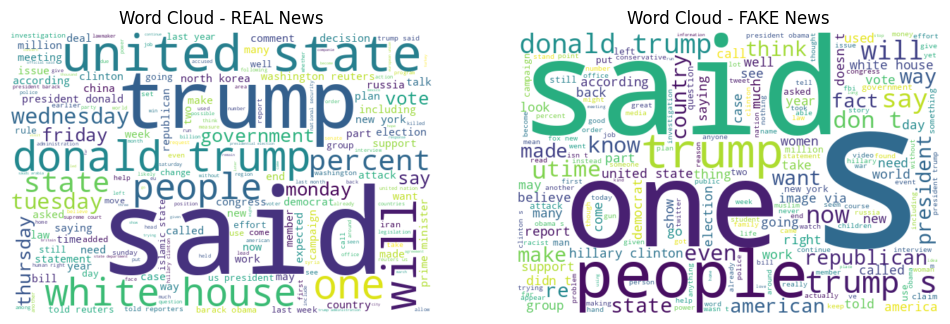

In [43]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Separate texts by label
real_texts = df[df['label']==1]['text']
fake_texts = df[df['label']==0]['text']

# Join into big strings
real_words = " ".join(real_texts)
fake_words = " ".join(fake_texts)

# Generate WordClouds
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
wc_real = WordCloud(width=600, height=400, background_color='white').generate(real_words)
plt.imshow(wc_real, interpolation='bilinear')
plt.title("Word Cloud - REAL News")
plt.axis('off')

plt.subplot(1,2,2)
wc_fake = WordCloud(width=600, height=400, background_color='white').generate(fake_words)
plt.imshow(wc_fake, interpolation='bilinear')
plt.title("Word Cloud - FAKE News")
plt.axis('off')

plt.show()


In [44]:
import nltk
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')
def tfidf_preprocess(text,stem=False):
  tokens = word_tokenize(text)  # Tokenize the text
  stop_words = set(stopwords.words('english'))  # Get English stopwords
  filtered_tokens = [word for word in tokens if word not in stop_words]  # Remove stopwords
  if stem:
      stemmer = nltk.PorterStemmer()
      filtered_tokens = [stemmer.stem(word) for word in filtered_tokens]  # Apply stemming
  else:
      lemmatizer = nltk.WordNetLemmatizer()
      filtered_tokens = [lemmatizer.lemmatize(word) for word in filtered_tokens]  # Apply lemmatization
  return ' '.join(filtered_tokens)  # Join tokens back into a string
classic=df.copy()
classic['text'] = classic['text'].apply(tfidf_preprocess)
classic['title'] = classic['title'].apply(tfidf_preprocess)

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


KeyboardInterrupt: 

In [ ]:
from collections import Counter
import seaborn as sns


def plot_top_words(texts, title, n=20):
    tokens = " ".join(texts).split()
    freq = Counter(tokens).most_common(n)
    words, counts = zip(*freq)

    plt.figure(figsize=(10,5))
    sns.barplot(x=list(counts), y=list(words))
    plt.title(title)
    plt.show()

plot_top_words(classic[classic["label"]==1]["text"], "Top Words - REAL", 20)
plot_top_words(classic[classic["label"]==0]["text"], "Top Words - FAKE", 20)


In [ ]:
print("Original text:", old_text,"\n")
print("TF-IDF Preprocessed text:", classic.iloc[0]['text'],"\n_______________\n")
print("Original title:", old_title,"\n")
print("TF-IDF Preprocessed title:", classic.iloc[0]['title'])

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack

def tfidf_bow(data):
  bow=CountVectorizer(max_features=1000,ngram_range=(1,2))
  bow_text=bow.fit_transform(data['text'])
  bow_title=bow.fit_transform(data['title'])
  bow_matrix = hstack((bow_text, bow_title))
  print("BOW shape:",bow_matrix.shape)

  tf_idf= TfidfVectorizer(max_features=1000,ngram_range=(1,2))
  tf_idf_text = tf_idf.fit_transform(data['text'])
  tf_idf_title = tf_idf.fit_transform(data['title'])
  tf_idf_matrix = hstack((tf_idf_text, tf_idf_title))
  print("TF-IDF shape:", tf_idf_matrix.shape)

  return tf_idf, tf_idf_matrix, bow, bow_matrix
tf_idf, tf_idf_matrix, bow, bow_matrix = tfidf_bow(classic)

In [ ]:
x_tf=tf_idf_matrix
x_bow=bow_matrix
y=classic['label']

x_tf_train, x_tf_test, y_tf_train, y_tf_test = train_test_split(x_tf, y, test_size=0.2, random_state=42,stratify=y)
x_bow_train, x_bow_test, y_bow_train, y_bow_test = train_test_split(x_bow, y, test_size=0.2, random_state=42,stratify=y)

In [ ]:
def lr_models():
  bow_lr = LogisticRegression(max_iter=1000)
  bow_lr.fit(x_bow_train, y_bow_train)
  lr_bow_pred = bow_lr.predict(x_bow_test)
  print("BOW Logistic Regression Accuracy:", accuracy_score(y_bow_test, lr_bow_pred))
  print(classification_report(y_bow_test, lr_bow_pred))

  tfidf_lr = LogisticRegression(max_iter=1000)
  tfidf_lr.fit(x_tf_train, y_tf_train)
  lr_tfidf_pred = tfidf_lr.predict(x_tf_test)
  print("TF-IDF Logistic Regression Accuracy:", accuracy_score(y_tf_test, lr_tfidf_pred))
  print(classification_report(y_tf_test, lr_tfidf_pred))

lr_models()

In [ ]:
def nb_models():
  bow_nb = MultinomialNB()
  bow_nb.fit(x_bow_train, y_bow_train)
  nb_bow_pred = bow_nb.predict(x_bow_test)
  print("BOW Naive Bayes Accuracy:", accuracy_score(y_bow_test, nb_bow_pred))
  print(classification_report(y_bow_test, nb_bow_pred))

  tfidf_nb = MultinomialNB()
  tfidf_nb.fit(x_tf_train, y_tf_train)
  nb_tfidf_pred = tfidf_nb.predict(x_tf_test)
  print("TF-IDF Naive Bayes Accuracy:", accuracy_score(y_tf_test, nb_tfidf_pred))
  print(classification_report(y_tf_test, nb_tfidf_pred))

nb_models()

In [ ]:
def svm_models():
  bow_svc = LinearSVC()
  bow_svc.fit(x_bow_train, y_bow_train)
  svc_bow_pred = bow_svc.predict(x_bow_test)
  print("BOW SVM Accuracy:", accuracy_score(y_bow_test, svc_bow_pred))
  print(classification_report(y_bow_test, svc_bow_pred))

  tfidf_svc = LinearSVC()
  tfidf_svc.fit(x_tf_train, y_tf_train)
  svc_tfidf_pred = tfidf_svc.predict(x_tf_test)
  print("TF-IDF SVM Accuracy:", accuracy_score(y_tf_test, svc_tfidf_pred))
  print(classification_report(y_tf_test, svc_tfidf_pred))

svm_models()

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

max_words = 10000   # keep top 10k words
max_len = 100       # pad/truncate all sequences to length 100

tokenizer = Tokenizer(num_words=max_words, oov_token="<UNK>")
tokenizer.fit_on_texts(df['title'])

sequences = tokenizer.texts_to_sequences(df['title'])
padded = pad_sequences(sequences, maxlen=max_len, padding='post', truncating='post')



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(padded, y, test_size=0.2, random_state=42,stratify=y)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Sequence model for Fake News Detection
def lstm_model():
    model = Sequential()
    model.add(Embedding(input_dim=max_words, output_dim=64, input_length=max_len))
    model.add(Bidirectional(LSTM(64, dropout=0.2, recurrent_dropout=0.2)))
    model.add(Dropout(0.3))
    model.add(Dense(1, activation="sigmoid"))

    model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
    return model

# Early stopping callback
early_stop = EarlyStopping(
    monitor='val_loss',   # Stop when validation loss stops improving
    patience=1,           # Number of epochs to wait before stopping
    restore_best_weights=True # Keep the best weights
)

# Training
lstm_m=lstm_model()
history = lstm_m.fit(
    X_train, y_train,
    epochs=10,             # Keep higher number, EarlyStopping will stop earlier if needed
    batch_size=128,
    validation_split=0.2,
    verbose=1,
    callbacks=[early_stop]
)


In [ ]:
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences

# --- 1. Evaluate on test data ---
test_loss_lstm, test_acc_lstm = lstm_m.evaluate(X_test, y_test, verbose=1)
print(f"Test Accuracy: {test_acc_lstm:.4f}")
print(f"Test Loss: {test_loss_lstm:.4f}")


In [ ]:
def predict_news(text, tokenizer, model, max_len=max_len, threshold=0.5):
    text = preprocess_text(text)
    seq = tokenizer.texts_to_sequences([text])
    padded = pad_sequences(seq, maxlen=max_len, padding='post')

    pred = model.predict(padded)[0][0]
    label = "REAL" if pred >= threshold else "FAKE"
    return f"Prediction: {label} ({pred:.2f})"



In [ ]:
# Example real-sounding article
text_real = "As U.S. budget fight looms, Republicans flip their fiscal script"
print(predict_news(text_real, tokenizer, lstm_m))

# Example fake-sounding article
text_fake = "Scientists confirm that chocolate cures all diseases and extends human life to 200 years."
print(predict_news(text_fake, tokenizer, lstm_m))


In [ ]:
from tensorflow.keras.layers import GRU
def GRU_model():
    model = Sequential()
    model.add(Embedding(input_dim=max_words, output_dim=64, input_length=max_len))
    model.add(Bidirectional(GRU(64, dropout=0.2, recurrent_dropout=0.2)))
    model.add(Dropout(0.3))
    model.add(Dense(1, activation="sigmoid"))

    model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
    return model

gru_m=GRU_model()
history = gru_m.fit(
    X_train, y_train,
    epochs=10,             # Keep higher number, EarlyStopping will stop earlier if needed
    batch_size=128,
    validation_split=0.2,
    verbose=1,
    callbacks=[early_stop]
)

In [ ]:
test_loss_gru,test_acc_gru= gru_m.evaluate(X_test, y_test, verbose=1)
print(f"Test Accuracy: {test_acc_gru:.4f}")
print(f"Test Loss: {test_loss_gru:.4f}")

In [ ]:
# Example real-sounding article
text_real = "As U.S. budget fight looms, Republicans flip their fiscal script"
print(predict_news(text_real, tokenizer, gru_m))

# Example fake-sounding article
text_fake = "Scientists confirm that chocolate cures all diseases and extends human life to 200 years."
print(predict_news(text_fake, tokenizer, gru_m))


In [ ]:
from tensorflow.keras.layers import SimpleRNN
def RNN_model():
    model = Sequential()
    model.add(Embedding(input_dim=max_words, output_dim=64, input_length=max_len))
    model.add(Bidirectional(SimpleRNN(64, dropout=0.2, recurrent_dropout=0.2)))
    model.add(Dropout(0.3))
    model.add(Dense(1, activation="sigmoid"))

    model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
    return model
rnn_m=RNN_model()
history = rnn_m.fit(
    X_train, y_train,
    epochs=10,
    batch_size=128,
    validation_split=0.2,
    verbose=1,
    callbacks=[early_stop]
)

In [ ]:
test_loss_rnn,test_acc_rnn= rnn_m.evaluate(X_test, y_test, verbose=1)
print(f"Test Accuracy: {test_acc_rnn:.4f}")
print(f"Test Loss: {test_loss_rnn:.4f}")

In [ ]:
# Example real-sounding article
text_real = "As U.S. budget fight looms, Republicans flip their fiscal script"
print(predict_news(text_real, tokenizer, rnn_m))

# Example fake-sounding article
text_fake = "Scientists confirm that chocolate cures all diseases and extends human life to 200 years."
print(predict_news(text_fake, tokenizer, rnn_m))


In [ ]:
print("GRU Model Evaluation:\n")
print(f"Test Accuracy: {test_acc_gru:.4f}")
print(f"Test Loss: {test_loss_gru:.4f}")
print("\n-----------------\n")
print("RNN Model Evaluation:")
print(f"Test Accuracy: {test_acc_rnn:.4f}")
print(f"Test Loss: {test_loss_rnn:.4f}")
print("\n-----------------\n")
print("LSTM Model Evaluation:\n")
print(f"Test Accuracy: {test_acc_lstm:.4f}")
print(f"Test Loss: {test_loss_lstm:.4f}")



In [ ]:
# --- Load GloVe embeddings ---
embeddings_index = {}
with open("glove.6B.50d.txt", encoding="utf8") as f:  # Kaggle file
    for line in f:
        values = line.split()
        word = values[0]
        coeffs = np.asarray(values[1:], dtype="float32")
        embeddings_index[word] = coeffs

print("Loaded %s word vectors." % len(embeddings_index))

# --- Build embedding matrix ---
embedding_dim = 50   # because glove.6B.50d.txt
word_index = tokenizer.word_index
num_words = min(max_words, len(word_index) + 1)

embedding_matrix = np.zeros((num_words, embedding_dim))
for word, i in word_index.items():
    if i < max_words:
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector


In [ ]:
from gensim.models import Word2Vec

texts = df["text"].astype(str).tolist()

# Tokenize each sentence
sentences = [word_tokenize(text.lower()) for text in texts]

# Train Word2Vec on your data
w2v_model = Word2Vec(
    sentences,
    vector_size=100,  # dimension size (can also try 200, 300)
    window=5,         # context window size
    min_count=2,      # ignore words with total frequency lower than this
    workers=4         # parallelism
)

# Access embeddings
print("Word2Vec vector size:", w2v_model.wv.vector_size)
print("Vocabulary size:", len(w2v_model.wv))

# Example: check most similar words
print(w2v_model.wv.most_similar("good", topn=5))

w2v_model.save("word2vec_trained.model")
w2v_model.wv.save_word2vec_format("word2vec_trained.vec")


In [ ]:
# --- Word2Vec embedding matrix ---
embedding_dim = 100
word_index = tokenizer.word_index
num_words = min(max_words, len(word_index) + 1)

w2v_embedding_matrix = np.zeros((num_words, embedding_dim))
for word, i in word_index.items():
    if i < max_words and word in w2v_model.wv:
        w2v_embedding_matrix[i] = w2v_model.wv[word]

print("Word2Vec Embedding Matrix shape:", w2v_embedding_matrix.shape)


In [ ]:
from gensim.models import FastText

ft_model = FastText(
    sentences,
    vector_size=100,
    window=5,
    min_count=2,
    workers=4
)

print("FastText vector size:", ft_model.wv.vector_size)
print("Vocabulary size:", len(ft_model.wv))
print(ft_model.wv.most_similar("good", topn=5))


In [ ]:
# --- FastText embedding matrix ---
ft_embedding_matrix = np.zeros((num_words, embedding_dim))
for word, i in word_index.items():
    if i < max_words and word in ft_model.wv:
        ft_embedding_matrix[i] = ft_model.wv[word]

print("FastText Embedding Matrix shape:", ft_embedding_matrix.shape)


In [ ]:
def lstm_glove():
    model = Sequential()
    model.add(Embedding(
        input_dim=num_words,
        output_dim=50,  # glove.6B.50d.txt
        weights=[embedding_matrix],
        input_length=max_len,
        trainable=False
    ))
    model.add(Bidirectional(LSTM(64, dropout=0.2, recurrent_dropout=0.2)))
    model.add(Dense(1, activation="sigmoid"))
    model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
    return model

def lstm_w2v():
    model = Sequential()
    model.add(Embedding(
        input_dim=num_words,
        output_dim=100,
        weights=[w2v_embedding_matrix],
        input_length=max_len,
        trainable=False
    ))
    model.add(Bidirectional(LSTM(64, dropout=0.2, recurrent_dropout=0.2)))
    model.add(Dense(1, activation="sigmoid"))
    model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
    return model

def lstm_fasttext():
    model = Sequential()
    model.add(Embedding(
        input_dim=num_words,
        output_dim=100,
        weights=[ft_embedding_matrix],
        input_length=max_len,
        trainable=False
    ))
    model.add(Bidirectional(LSTM(64, dropout=0.2, recurrent_dropout=0.2)))
    model.add(Dense(1, activation="sigmoid"))
    model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
    return model


In [ ]:
models = {
    "GloVe": lstm_glove(),
    "Word2Vec": lstm_w2v(),
    "FastText": lstm_fasttext()
}

for name, model in models.items():
    print(f"\nTraining {name} model...")
    history = model.fit(
        X_train, y_train,
        epochs=5,
        batch_size=128,
        validation_split=0.2,
        callbacks=[early_stop],
        verbose=1
    )
    loss, acc = model.evaluate(X_test, y_test, verbose=0)
    print(f"{name} Test Accuracy: {acc:.4f} | Test Loss: {loss:.4f}")


In [45]:
from datasets import Dataset
from transformers import AutoTokenizer, AutoModelForSequenceClassification, TrainingArguments, Trainer
import torch


In [46]:
df["label"] = df["label"].astype(int)  # make sure labels are integers

# Train/validation split
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42, stratify=df["label"])

# Convert to HuggingFace Dataset
train_dataset = Dataset.from_pandas(train_df)
test_dataset = Dataset.from_pandas(test_df)


In [49]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification, TrainingArguments, Trainer
import evaluate
import pandas as pd
from datasets import Dataset, DatasetDict

# ============================
# Load Data into Dataset
# ============================
train_df = pd.DataFrame({"text": X_train.tolist(), "label": y_train.tolist()})
test_df = pd.DataFrame({"text": X_test.tolist(), "label": y_test.tolist()})

train_dataset = Dataset.from_pandas(train_df)
test_dataset = Dataset.from_pandas(test_df)
dataset = DatasetDict({"train": train_dataset, "test": test_dataset})

# ============================
# Check type of data
# ============================
print("Sample from train dataset:", train_dataset[0])
print("Type of 'text' column:", type(train_dataset[0]["text"]))

# ============================
# If already tokenized, no need to tokenize again
# Just rename 'text' to 'input_ids'
# ============================
train_dataset = train_dataset.rename_column("text", "input_ids")
test_dataset = test_dataset.rename_column("text", "input_ids")

# ============================
# Add attention masks (1 for tokens, 0 for padding)
# ============================
def add_attention_mask(batch):
    batch["attention_mask"] = [[1 if token_id != 0 else 0 for token_id in ids] for ids in batch["input_ids"]]
    return batch

train_dataset = train_dataset.map(add_attention_mask, batched=True)
test_dataset = test_dataset.map(add_attention_mask, batched=True)

# ============================
# Set dataset format for PyTorch
# ============================
train_dataset.set_format("torch", columns=["input_ids", "attention_mask", "label"])
test_dataset.set_format("torch", columns=["input_ids", "attention_mask", "label"])

# ============================
# Load pretrained model
# ============================
model_name = "distilbert-base-uncased"  # or "bert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_name)

model = AutoModelForSequenceClassification.from_pretrained(
    model_name,
    num_labels=2  # Fake vs Real
)

# ============================
# Metrics
# ============================
accuracy = evaluate.load("accuracy")

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = logits.argmax(axis=-1)
    return accuracy.compute(predictions=predictions, references=labels)

# ============================
# Training Arguments
# ============================
training_args = TrainingArguments(
    output_dir="./results",
    eval_strategy="steps",        # ✅ correct
    save_strategy="steps",        # ✅ correct
    logging_strategy="steps",     # ✅ if you want logging per step
    eval_steps=500,               # ✅ evaluation frequency
    save_steps=500,               # ✅ saving frequency
    logging_steps=100,            # ✅ logging frequency
)


# ============================
# Trainer
# ============================
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics
)

# ============================
# Train
# ============================
trainer.train()


Sample from train dataset: {'text': [125, 4003, 1, 1, 843, 106, 13, 11, 5985, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'label': 1}
Type of 'text' column: <class 'list'>


Map:   0%|          | 0/35918 [00:00<?, ? examples/s]

Map:   0%|          | 0/8980 [00:00<?, ? examples/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


/tmp/ipython-input-3445029607.py:83: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(
/usr/local/lib/python3.12/dist-packages/notebook/notebookapp.py:191: SyntaxWarning: invalid escape sequence '\/'
  | |_| | '_ \/ _` / _` |  _/ -_)


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize?ref=models
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: adhameman2005 (adhameman2005-a) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


Step,Training Loss,Validation Loss,Accuracy
500,0.269800,0.282725,0.901670
1000,0.238200,0.262338,0.909465
1500,0.178700,0.360941,0.924722
2000,0.190200,0.193117,0.937639
2500,0.202400,0.231812,0.946659
3000,0.140400,0.180206,0.950557
3500,0.239400,0.159811,0.951336
4000,0.215800,0.207007,0.950445
4500,0.178800,0.161650,0.931626
5000,0.136500,0.176202,0.956013


TrainOutput(global_step=13470, training_loss=0.147205880790971, metrics={'train_runtime': 2545.4595, 'train_samples_per_second': 42.332, 'train_steps_per_second': 5.292, 'total_flos': 2787869545855200.0, 'train_loss': 0.147205880790971, 'epoch': 3.0})

In [51]:
from google.colab import drive
drive.mount('/content/drive')

# Save your model in your Drive
model.save_pretrained("/content/drive/MyDrive/my_saved_model")
tokenizer.save_pretrained("/content/drive/MyDrive/my_saved_model")



Mounted at /content/drive


('/content/drive/MyDrive/my_saved_model/tokenizer_config.json',
 '/content/drive/MyDrive/my_saved_model/special_tokens_map.json',
 '/content/drive/MyDrive/my_saved_model/vocab.txt',
 '/content/drive/MyDrive/my_saved_model/added_tokens.json',
 '/content/drive/MyDrive/my_saved_model/tokenizer.json')

In [58]:
import pandas as pd
from transformers import pipeline
from tqdm import tqdm
import os

# ========================
# Load your dataset
# ========================
texts = df["text"].astype(str).tolist()

# ========================
# Set device (GPU if available)
# ========================
device = 0  # cuda:0
print(f"Device set to use cuda:{device}")

# ========================
# Sentiment classifier
# ========================
classifier = pipeline(
    "zero-shot-classification",
    model="typeform/distilbert-base-uncased-mnli",  # FASTER than BART
    device=device,
    truncation=True,
    max_length=512
)

candidate_labels = ["positive", "negative", "neutral"]
output_file = "sentiment_results.csv"

# ========================
# Classification function with autosave
# ========================
def classify_sentiment(texts, batch_size=64, save_every=200):
    results = []
    start_idx = 0

    # Resume if partial results exist
    if os.path.exists(output_file):
        saved_df = pd.read_csv(output_file)
        results = saved_df["sentiment"].tolist()
        start_idx = len(results)
        print(f"🔄 Resuming from {start_idx}/{len(texts)}")

    for i in tqdm(range(start_idx, len(texts), batch_size), desc="Classifying"):
        batch = texts[i:i+batch_size]
        batch_results = classifier(batch, candidate_labels, multi_label=False)

        for r in batch_results:
            results.append(r["labels"][0])

        # Save progress every N batches
        if (i // batch_size) % save_every == 0 and i > 0:
            temp_df = pd.DataFrame({"text": texts[:i+len(batch)], "sentiment": results})
            temp_df.to_csv(output_file, index=False)
            print(f"✅ Progress saved at {i+len(batch)}/{len(texts)} rows")

    return results

# ========================
# Run classification
# ========================
df["sentiment"] = classify_sentiment(texts, batch_size=64)

# Save final
df.to_csv(output_file, index=False)
print("🎉 Final results saved to:", output_file)


Device set to use cuda:0


config.json:   0%|          | 0.00/776 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/258 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

Device set to use cuda:0
Classifying:  29%|██▊       | 201/702 [08:45<24:31,  2.94s/it]

✅ Progress saved at 12864/44898 rows


Classifying:  57%|█████▋    | 401/702 [17:23<15:16,  3.05s/it]

✅ Progress saved at 25664/44898 rows


Classifying:  86%|████████▌ | 601/702 [26:01<06:12,  3.69s/it]

✅ Progress saved at 38464/44898 rows


Classifying: 100%|██████████| 702/702 [30:22<00:00,  2.60s/it]


🎉 Final results saved to: sentiment_results.csv


In [59]:
df["sentiment"]

,sentiment
0,negative
1,positive
2,positive
3,negative
4,neutral
...,...
44893,positive
44894,neutral
44895,negative
44896,negative


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from datasets import Dataset
from transformers import AutoTokenizer, AutoModelForSequenceClassification, TrainingArguments, Trainer
import torch

# ==========================
# 1. Load your dataset
# ==========================

# Encode labels
label2id = {"negative": 0, "neutral": 1, "positive": 2}
id2label = {v: k for k, v in label2id.items()}
df["label"] = df["sentiment"].map(label2id)

# Train-test split
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# Convert to Hugging Face Dataset
train_dataset = Dataset.from_pandas(train_df)
test_dataset = Dataset.from_pandas(test_df)

# ==========================
# 2. Tokenizer
# ==========================
model_name = "bert-base-uncased"  # you can change to roberta-base, distilbert-base-uncased, etc.
tokenizer = AutoTokenizer.from_pretrained(model_name)

def tokenize_function(batch):
    return tokenizer(batch["text"], padding="max_length", truncation=True, max_length=128)

train_dataset = train_dataset.map(tokenize_function, batched=True)
test_dataset = test_dataset.map(tokenize_function, batched=True)

train_dataset = train_dataset.rename_column("label", "labels")
train_dataset.set_format("torch", columns=["input_ids", "attention_mask", "labels"])
test_dataset = test_dataset.rename_column("label", "labels")
test_dataset.set_format("torch", columns=["input_ids", "attention_mask", "labels"])

# ==========================
# 3. Model
# ==========================
model = AutoModelForSequenceClassification.from_pretrained(
    model_name,
    num_labels=len(label2id),
    id2label=id2label,
    label2id=label2id
)

# ==========================
# 4. Training setup
# ==========================
training_args = TrainingArguments(
    output_dir="./results",
    eval_strategy="steps",        # ✅ correct
    save_strategy="steps",        # ✅ correct
    logging_strategy="steps",     # ✅ if you want logging per step
    eval_steps=1500,               # ✅ evaluation frequency
    save_steps=500,               # ✅ saving frequency
    logging_steps=100,            # ✅ logging frequency
)

# ==========================
# 5. Trainer
# ==========================
from evaluate import load
accuracy = load("accuracy")

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = torch.argmax(torch.tensor(logits), dim=-1)
    return accuracy.compute(predictions=predictions, references=labels)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics
)

# ==========================
# 6. Train 🚀
# ==========================
trainer.train()

# ==========================
# 7. Save model
# ==========================
trainer.save_model("./sentiment_model")
tokenizer.save_pretrained("./sentiment_model")

print("🎉 Training complete! Model saved in ./sentiment_model")


Map:   0%|          | 0/35918 [00:00<?, ? examples/s]

Map:   0%|          | 0/8980 [00:00<?, ? examples/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/tmp/ipython-input-435875439.py:74: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Step,Training Loss,Validation Loss
